<h1>Entrega 6</h1>
<p><b>Autores:</b>Saúl Fernández, Alejandro Esperón, Jacobo Rivas Lago y Cristian Sousa Vidal</p>

<p>Siguiendo el ejercicio de clustering relacionado con el dataset de ecommerce.</p>
<ol>
    <li><p>Crea una gráfica de tartas que represente en cada porción la cantidad de compras que se hacen por día de semana (lunes, martes, miércoles, etc). ¿Qué conclusiones podéis sacar de esto?</p></li>
    <li><p>Utiliza el PCA como paso previo al K-means. ¿Habeis obtenido mejores resultados? ¿Por qué?</p>
    <li><p>Busca el mejor resultado para el K-means, podéis utilizar todas las técnicas aprendias anteriormente.</p></li>
</ol>



## Ejercicio 1

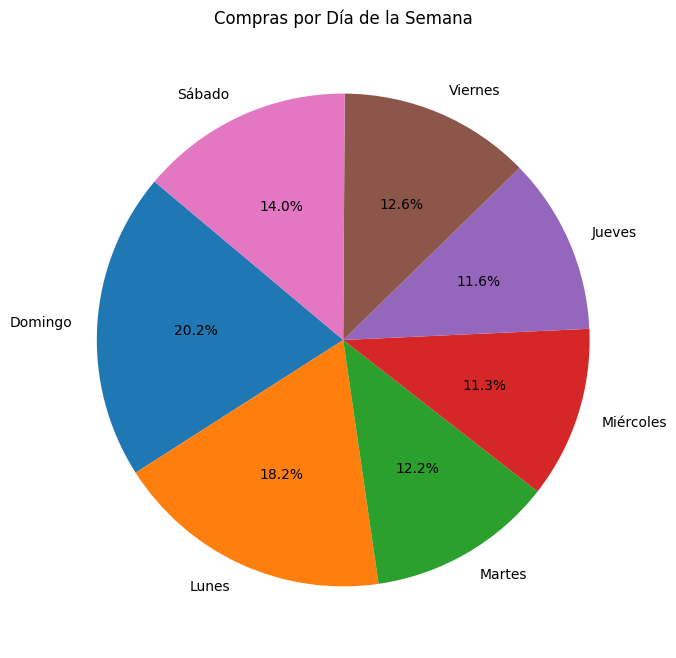

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga del dataset
ecommerce_df = pd.read_csv('./ecommerce.csv')

# Contando el número de compras por día de la semana
purchase_counts = ecommerce_df['order_dow'].value_counts().sort_index()

# Mapeo de días de la semana para mejorar la legibilidad
days_of_week = {
    0: 'Domingo',
    1: 'Lunes',
    2: 'Martes',
    3: 'Miércoles',
    4: 'Jueves',
    5: 'Viernes',
    6: 'Sábado'
}
purchase_counts.index = purchase_counts.index.map(days_of_week)

# Creación de la gráfica de tartas
plt.figure(figsize=(10, 8))
plt.pie(purchase_counts, labels=purchase_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Compras por Día de la Semana')
plt.show()

Domingo y Lunes son los días más populares para las compras: El domingo lidera con el 20.1% del total de las compras, seguido de cerca por el lunes con el 18.2%. Esto podría indicar que muchas personas prefieren hacer sus compras al comienzo de la semana.

Mitad de la semana con menor actividad: Los días de mitad de semana (martes, miércoles y jueves) muestran una actividad más baja en comparación con el inicio y el fin de semana. Esto puede sugerir que los consumidores tienden a planificar sus compras alrededor de los fines de semana.

Actividad moderada hacia el fin de semana: A medida que la semana avanza hacia el fin de semana, hay un ligero aumento en la actividad de compra, con el viernes y el sábado mostrando un 12.6% y 14.0% respectivamente del total de compras.

## Ejercicio 2

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Ruta al archivo del dataset
dataset_path = './ecommerce.csv'

# Cargar el dataset
ecommerce_df = pd.read_csv(dataset_path)

# Seleccionar algunas columnas relevantes para el análisis
selected_columns = ['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order', 'reordered']

# Filtrar el dataset para incluir solo las columnas seleccionadas
filtered_df = ecommerce_df[selected_columns]

# Rellenar los valores NaN con la media de cada columna
filtered_df = filtered_df.fillna(filtered_df.mean())

# Estandarizar las características
scaler = StandardScaler()
filtered_scaled = scaler.fit_transform(filtered_df)

# Aplicar PCA
pca = PCA(n_components=2)
filtered_pca = pca.fit_transform(filtered_scaled)

# Aplicar K-means
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(filtered_pca)

# Evaluar los resultados
inertia = kmeans.inertia_
silhouette = silhouette_score(filtered_pca, clusters)

print(f"Inercia: {inertia}")
print(f"Coeficiente de Silueta: {silhouette}")


c:\Users\Saul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Inercia: 87041.69260833836
Coeficiente de Silueta: 0.3299834381566088


Se han obtenido mejores resultados gracias al filtrado PCA, PCA reduce la cantidad de dimensiones (características) del conjunto de datos, manteniendo aquellas que aportan la mayor variabilidad (información). Esto elimina el ruido y las correlaciones innecesarias entre características.

## Ejercicio 3

Inercia para:  2 El cluster es:  154471.82178602394
Inercia para:  3 El cluster es:  111521.30132824989
Inercia para:  4 El cluster es:  87050.79972465882
Inercia para:  5 El cluster es:  69282.97404110018
Inercia para:  6 El cluster es:  60810.0891486283
Inercia para:  7 El cluster es:  53638.27380714978
Inercia para:  8 El cluster es:  46922.73445771279
Inercia para:  9 El cluster es:  43499.67766722642


Text(0.5, 1.0, 'Inertia Plot per k')

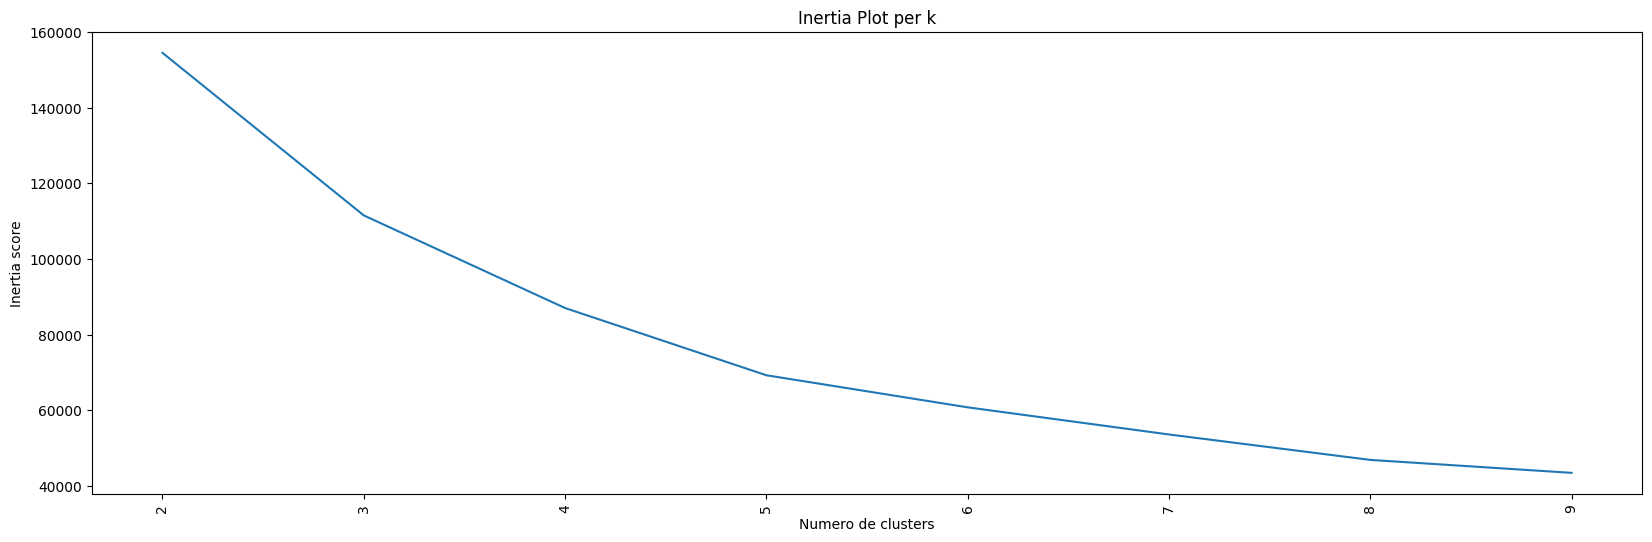

In [17]:
from sklearn.cluster import KMeans
import numpy as np

no_of_clusters = range(2,10)
inertia = []

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=42, n_init="auto")
    kmeans = kmeans.fit(filtered_pca)
    u = kmeans.inertia_
    inertia.append(u)
    print("Inercia para: ", f, "El cluster es: ", u)
    


fig, (ax1) = plt.subplots(1, figsize = (20, 6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation = "vertical")
plt.xlabel("Numero de clusters")
plt.ylabel("Inertia score")
plt.title("Inertia Plot per k")

In [18]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init="auto")
kmeans = kmeans.fit(filtered_pca)

predictions = kmeans.predict(filtered_pca)

print(len(predictions))

print(predictions)

unique, counts = np.unique(predictions, return_counts = True)

for i, count in enumerate(counts):
    print(f"Cluster {i}: {count}")

100000
[3 3 3 ... 1 2 2]
Cluster 0: 24383
Cluster 1: 24405
Cluster 2: 26197
Cluster 3: 25015


<Figure size 640x480 with 0 Axes>

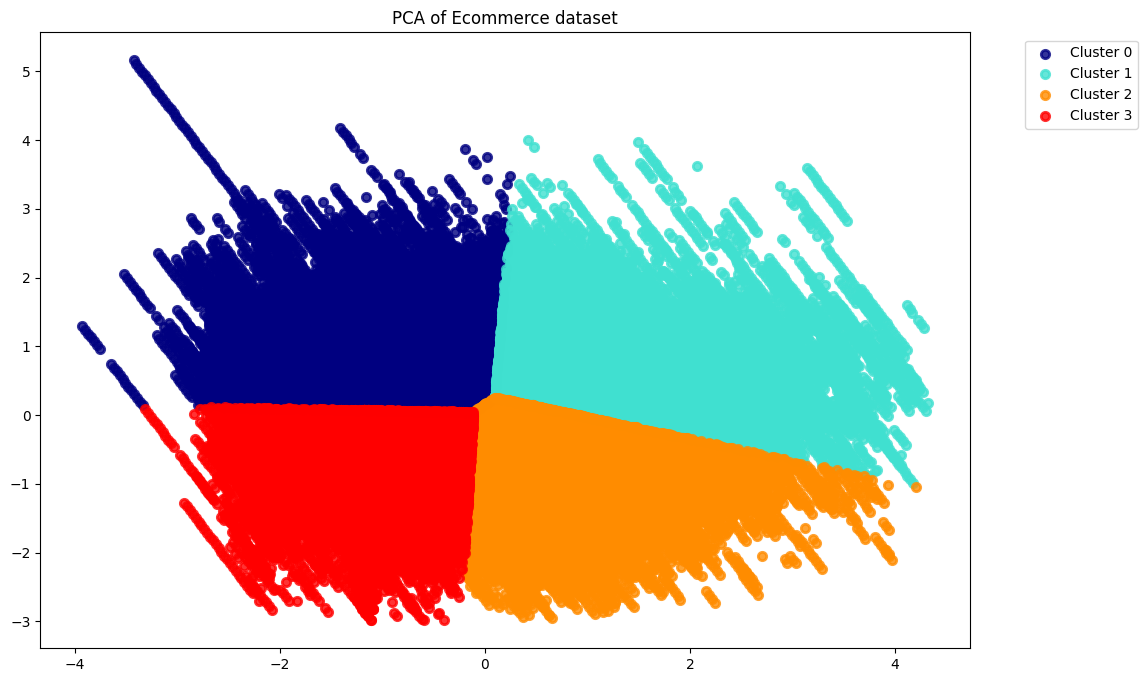

In [19]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = filtered_pca
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2","Cluster 3"]

pca = PCA(n_components=2, random_state=42)
X_r = pca.fit(X).transform(X)



plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0,1,2,3], target_names):
    plt.scatter(X_r[y_num == i,0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.6)
plt.title('PCA of Ecommerce dataset')
plt.show()